In [2]:
import pandas as pd
import numpy as np

# Load the dataset from the two worksheets
data_2019_2020 = pd.read_csv("2019_2020.csv")
data_2020_2021 = pd.read_csv("2020_2021.csv")

In [3]:

# Examine the datasets in two different work sheets
print(data_2019_2020.iloc[0])
print(data_2020_2021.iloc[0])

Div                 E0
Date        09/08/2019
Time             20:00
HomeTeam     Liverpool
AwayTeam       Norwich
               ...    
PCAHA             1.98
MaxCAHH           1.99
MaxCAHA           2.07
AvgCAHH            1.9
AvgCAHA           1.99
Name: 0, Length: 106, dtype: object
Div                 E0
Date        12/09/2020
Time             12:30
HomeTeam        Fulham
AwayTeam       Arsenal
               ...    
PCAHA             1.91
MaxCAHH           2.13
MaxCAHA           1.92
AvgCAHH           2.02
AvgCAHA           1.87
Name: 0, Length: 106, dtype: object


In [4]:
data_2019_2020.isnull().sum()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 106, dtype: int64

In [5]:
data_2020_2021.isnull().sum()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 106, dtype: int64

In [6]:
import matplotlib
import matplotlib.pyplot as plt


In [7]:
dataset_all = pd.concat([data_2019_2020,data_2020_2021])

In [8]:
home_wins = dataset_all[dataset_all['FTR'] == 'H'].count()
proportion = home_wins/len(dataset_all.index)
print(proportion)

Div         0.415789
Date        0.415789
Time        0.415789
HomeTeam    0.415789
AwayTeam    0.415789
              ...   
PCAHA       0.415789
MaxCAHH     0.415789
MaxCAHA     0.415789
AvgCAHH     0.415789
AvgCAHA     0.415789
Length: 106, dtype: float64


Of all matched player during 2019-2021 seasons, There are 316 home wins accounting for 41.58% of total games. 

In [9]:
away_wins = dataset_all[dataset_all['FTR'] == 'A'].count()
proportion = away_wins/len(dataset_all.index)
print(proportion)

Div         0.353947
Date        0.353947
Time        0.353947
HomeTeam    0.353947
AwayTeam    0.353947
              ...   
PCAHA       0.353947
MaxCAHH     0.353947
MaxCAHA     0.353947
AvgCAHH     0.353947
AvgCAHA     0.353947
Length: 106, dtype: float64


Of all matched player during 2019-2021 seasons, There are 316 away wins accounting for 35.39% of total games. 

In [10]:
# Splitting the Invoice date to Year,Month and Day for data analysis
dataset_all['Year'] = pd.DatetimeIndex(dataset_all['Date']).year
dataset_all['Month'] = pd.DatetimeIndex(dataset_all['Date']).month
dataset_all['Day'] = pd.DatetimeIndex(dataset_all['Date']).day

In [11]:
dataset_all.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Year,Month,Day
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,1.99,1.94,1.98,1.99,2.07,1.90,1.99,2019,9,8
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,1.95,1.96,1.97,2.07,1.98,1.97,1.92,2019,10,8
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.95,1.98,1.95,2.00,1.96,1.96,1.92,2019,10,8
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,2.03,1.89,2.03,1.90,2.07,1.86,2.02,2019,10,8
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,2.08,1.97,1.96,2.03,2.08,1.96,1.93,2019,10,8


In [12]:
subset_dataset_all = dataset_all[["Div", "Time","HomeTeam","AwayTeam","Year","Month","Day","HS","AS","FTR","HTR"]]
subset_dataset_all.groupby(["Year","Month","Day"]).head()

,Div,Time,HomeTeam,AwayTeam,Year,Month,Day,HS,AS,FTR,HTR
0,E0,20:00,Liverpool,Norwich,2019,9,8,15,12,H,H
1,E0,12:30,West Ham,Man City,2019,10,8,5,14,A,A
2,E0,15:00,Bournemouth,Sheffield United,2019,10,8,13,8,D,D
3,E0,15:00,Burnley,Southampton,2019,10,8,10,11,H,D
4,E0,15:00,Crystal Palace,Everton,2019,10,8,6,10,D,D
...,...,...,...,...,...,...,...,...,...,...,...
370,E0,16:00,Arsenal,Brighton,2021,5,23,16,5,H,D
371,E0,16:00,Aston Villa,Chelsea,2021,5,23,6,23,H,H
372,E0,16:00,Fulham,Newcastle,2021,5,23,14,10,A,A
373,E0,16:00,Leeds,West Brom,2021,5,23,17,14,H,H


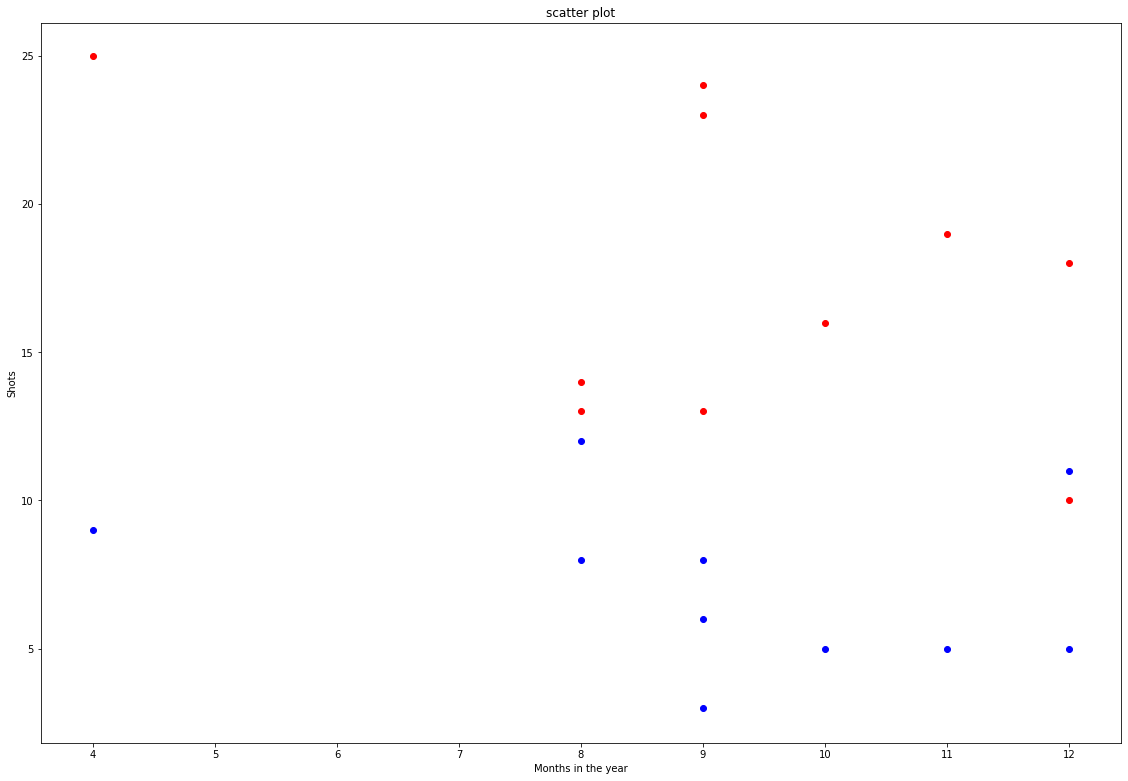

In [13]:
subset_chelesea = subset_dataset_all[subset_dataset_all["HomeTeam"] == "Chelsea"]
x1 = subset_chelesea[subset_chelesea["Year"] == 2019]["Month"]
y1 = subset_chelesea[subset_chelesea["Year"] == 2019]["HS"]
y2 = subset_chelesea[subset_chelesea["Year"] == 2019]["AS"]

# fig = plt.figure()
fig = plt.figure(figsize=(15,10))


ax = fig.add_axes([0,0,1,1])
ax.scatter(x1, y1, color='r')
ax.scatter(x1, y2, color='b')
ax.set_xlabel('Months in the year')
ax.set_ylabel('Shots')
ax.set_title('scatter plot')
plt.show()